In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment_6.ipynb")

# STK 353

## Assignment 6: Machine Learning


### Total points: 30

- Submission deadline: 23:00, Wednesday 19 October 2022.
- This assignment is individual work.
- Some of the tests are hidden, and some are visible in order to guide you.
- For this assignment use a seed of 33 throughout.


## Load the required packages

In [2]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans

### Question 1 - Prepare the data

The data can be found in 'kindle_reviews.csv'. In this assignment, you are required to predict the number of positive and negative reviews using logistic regression and naive Bayes. Furthermore, you are required to determine the underlying topics using latent Dirichlet allocation.

#### Question 1.1 [2]

- Use the code provided to read the data 'kindle_reviews' into a dataframe and call it 'data_original'.
- **Important**: Make sure the dataset is saved in the **same** directory as your notebook.
- Convert the rating column to a binary rating where you assign the value 'positive' to ratings greater than 3 and the value 'negative' to ratings less than or equal to 3. 
- Write the reviewText column to a list. Call this list 'Reviews'.


**Note**: Pay attention to the variable names specified. It is important that you keep to the names specified.

<!--
BEGIN QUESTION
name: q1.1
points: 
    each: 0.5
-->

In [3]:
data_original = pd.read_csv('kindle_reviews.csv')
conditions = [data_original.rating > 3,data_original.rating <= 3,]
values = ['Positive', 'Negative']
data_original['rating'] = np.select(conditions, values)
Reviews = list(data_original.reviewText)
print(data_original.head())

   Unnamed: 0    rating                                         reviewText  \
0           0  Negative  When I read the description for this book, I c...   
1           1  Positive  I just had to edit this review. This book is a...   
2           2  Positive  I don't normally buy 'mystery' novels because ...   
3           3  Positive  This isn't the kind of book I normally read, a...   
4           4  Positive  I really enjoyed how this story developed.  It...   

                                             summary  
0                            Boring! Boring! Boring!  
1                    Wiggleliscious/new toy ready/!!  
2                                    Very good read.  
3                                       Great Story!  
4  When an Alien Scientist Gets Lost in the Orego...  


In [4]:
grader.check("q1.1")

q1.1 results: All test cases passed!

#### Question 1.2 [1]

- Make a copy of the dataframe 'data_original' and name this 'data'. Use the code provided to make the copy of the dataframe.
- Use sklearn.preprocessing LabelEncoder to encode the labels to binary values 0 or 1. Make a new column in the new dataframe, 'data', for this encoding and call it 'response'. Positive sentiment will be 1 and a negative sentiment will be 0.
- Drop all extra columns such that your dataframe 'data' only contains the reviewText and response columns.

<!--
BEGIN QUESTION
name: q1.2
points: 1
-->

In [5]:
data = data_original.copy()
label_encoder = LabelEncoder()
data['response']=label_encoder.fit_transform(data['rating'])
data = data[['reviewText','response']]
print(data.head())

                                          reviewText  response
0  When I read the description for this book, I c...         0
1  I just had to edit this review. This book is a...         1
2  I don't normally buy 'mystery' novels because ...         1
3  This isn't the kind of book I normally read, a...         1
4  I really enjoyed how this story developed.  It...         1


In [6]:
grader.check("q1.2")

q1.2 results: All test cases passed!

## Book review sentiment classification

### Question 2 -  Logistic Regression

#### Question 2.1 [3]

- Use the sklearn TfidfVectorizer. Use the following parameters:
    - stop_words = 'english'.
    - token_pattern = r'\b[^\d\W]+\b'. 
- Call the instantiation 'tfidf'.
- Get the vectorization (call it bag_of_words) and the feature names (call it 'feature_names_reg').
- Write the vectorization to a dataframe with the feature_names as column headings. Call the dataframe 'vectorized_text_reg'.

<!--
BEGIN QUESTION
name: q2.1
points: 
    each: 1
-->

In [7]:
tfidf = TfidfVectorizer(stop_words = 'english',token_pattern = r'\b[^\d\W]+\b')
bag_of_words = tfidf.fit_transform(Reviews)
feature_names_reg = tfidf.get_feature_names()
vectorized_text_reg = pd.DataFrame(bag_of_words.todense(),columns=feature_names_reg)


In [8]:
grader.check("q2.1")

q2.1 results: All test cases passed!

#### Question 2.2 [1]

Split the data into a training and test set.

- Use a 80/20 split.
- Use a seed of 33.
- Name the training and test sets: X_train, Y_train, X_test, Y_test.

<!--
BEGIN QUESTION
name: q2.2
points: 
    each: 0.5
-->

In [9]:
train, test = train_test_split(vectorized_text_reg,test_size=0.2,random_state=33)

X_train = train
Y_train = data['response'][train.index]

X_test = test
Y_test = data['response'][test.index]


In [10]:
grader.check("q2.2")

q2.2 results: All test cases passed!

#### Question 2.3a [1]

- Use the training set to check the class imbalance of the data set and call it 'class_ratio'.

<!--
BEGIN QUESTION
name: q2.3a
points: 1
-->

In [11]:
class_ratio = Y_train.value_counts(normalize=True)*100

print(class_ratio)

0    51.46875
1    48.53125
Name: response, dtype: float64


In [12]:
grader.check("q2.3a")

q2.3a results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Question 2.3b [1]

In the markdown cell below, comment on the class ratio.

<!--
BEGIN QUESTION
name: q2.3b
points: 1
manual: true
-->

_The Class ratio shows that the class is balanced we have a 51:49 ratio.Thus accuracy is an appropriate evaluation metric._

<!-- END QUESTION -->

#### Question 2.4  [1]

Create an instance of the logistic regression model. Specify solver = 'lbfgs'.

- Fit the model to the training data and call it 'log_model'. 
- Calculate the accuracy on the training data and call it 'log_acc'.

<!--
BEGIN QUESTION
name: q2.4
points: 1
-->

In [13]:
model = LogisticRegression(solver = 'lbfgs', random_state = 33)
log_model = model.fit(X_train,Y_train)
log_acc = log_model.score(X_train, Y_train)
print(log_acc)

0.925


In [14]:
grader.check("q2.4")

q2.4 results: All test cases passed!

#### Question 2.5 [3]

Predict class labels for the test set and calculate the class probabilities.

- Call the predicted class labels 'pred'.
- Call the predicted class probabilities 'probs'.

Calculate the following,

- Calculate the accuracy score on the test set and call it 'log_acc_score'.
- Calculate the precision score on the test set and call it 'log_prec_score'.
- Calculate the recall score on the test set and call it 'log_rec_score'.
- Calculate the auc (area under the curve) score on the test set and call it 'log_auc_score'.

**Note**: Round the 'log_acc_score', 'log_prec_score', 'log_rec_score', and 'log_auc_score' values to 4 decimal points.

<!--
BEGIN QUESTION
name: q2.5
points: 
    each: 1
-->

In [15]:
pred = model.predict(X_test)
probs = model.predict_proba(X_test)

log_acc_score = round(metrics.accuracy_score(Y_test, pred), 4)
log_prec_score =round( metrics.precision_score(Y_test,pred),4)
log_rec_score = round(metrics.recall_score(Y_test,pred),4)
log_auc_score = round(metrics.roc_auc_score(Y_test,model.predict_proba(X_test)[::,1]), 4)

print(log_acc_score,log_prec_score, log_rec_score,log_auc_score)

0.8125 0.8305 0.8109 0.8857


In [16]:
grader.check("q2.5")

q2.5 results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Question 2.6 [3]

Draw the ROC curve.

- Provide a title, x and y label.

<!--
BEGIN QUESTION
name: q2.7
manual: true
points: 3
-->

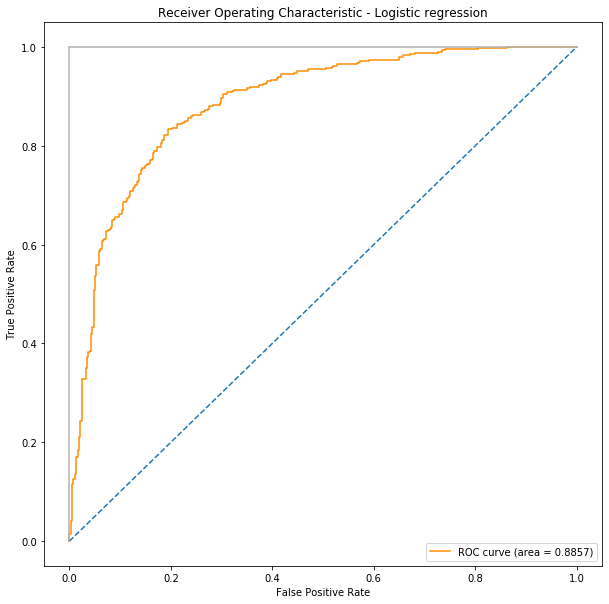

In [17]:

false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(Y_test,model.predict_proba(X_test)[::,1])

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate,color = 'darkorange',label = 'ROC curve (area = %0.4f)' % metrics.roc_auc_score(Y_test, probs[:, 1]))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = "lower right")
plt.show()

<!-- END QUESTION -->



### Question 3 -  Naive Bayes Classifier

#### Question 3.1 [3]

- Use the sklearn Countvectorizer. Use the following parameters:
    - stop_words = 'english'.
    - token_pattern = r'\b[^\d\W]+\b'. 
- Call the instantiation 'matrix'.
- Get the vectorization (call it bag_of_words) and the feature names (call it 'feature_names_nb').
- Write the vectorization to a dataframe with the feature_names as column headings. Call the dataframe 'vectorized_text_nb'.

<!--
BEGIN QUESTION
name: q3.1
points: 
    each: 1
-->

In [18]:
matrix= CountVectorizer(stop_words = 'english',token_pattern = r'\b[^\d\W]+\b')
bag_of_words = matrix.fit_transform(Reviews)
feature_names_nb = matrix.get_feature_names()
vectorized_text_nb = pd.DataFrame(bag_of_words.todense(),columns=feature_names_nb)


In [19]:
grader.check("q3.1")

q3.1 results: All test cases passed!

#### Question 3.2 [1]

Split the data into a training and test set.

- Use a 80/20 split.
- Use a seed of 33.
- Name the training and test sets: X_train_nb, Y_train_nb, X_test_nb, Y_test_nb.

<!--
BEGIN QUESTION
name: q3.2
points: 
    each: 0.5
-->

In [20]:
train, test = train_test_split(vectorized_text_nb,test_size=0.2,random_state=33)

X_train_nb = train
Y_train_nb = data['response'][train.index]

X_test_nb = test
Y_test_nb = data['response'][test.index]

In [21]:
grader.check("q3.2")

q3.2 results: All test cases passed!

#### Question 3.3 [1]

Create an instance of the Naive Bayes model.

- Use MultinomialNB.
- Fit the model to the training data and call it 'nb_model'. 
- Calculate the accuracy on the training data and call it 'nb_acc'.

**Note**: Round the 'nb_acc' value to 4 decimal points.

<!--
BEGIN QUESTION
name: q3.3
points: 1
-->

In [22]:
nb = MultinomialNB()
nb_model = nb.fit(X_train_nb,Y_train_nb)
nb_acc = round(nb_model.score(X_train_nb,Y_train_nb),4)

In [23]:
grader.check("q3.3")

q3.3 results: All test cases passed!

#### Question 3.4 [3]

Predict class labels for the test set and calculate the class probabilities.

- Call the predicted class labels 'predicted'.

Calculate the following,

- Calculate the accuracy score on the test set and call it 'nb_acc_score'.
- Calculate the precision score on the test set and call it 'nb_prec_score'.
- Calculate the recall score on the test set and call it 'nb_rec_score'.

**Note**: Round the 'nb_acc_score', 'nb_prec_score' and 'nb_rec_score' values to 4 decimal points.

<!--
BEGIN QUESTION
name: q3.4
points: 
    each: 1
-->

In [24]:
predicted = nb_model.predict(X_test_nb)

nb_acc_score = round(metrics.accuracy_score(Y_test_nb,predicted),4)
nb_prec_score =round( metrics.precision_score(Y_test_nb,predicted),4)
nb_rec_score = round(metrics.recall_score(Y_test_nb,predicted),4)

print(nb_acc_score,nb_prec_score,nb_rec_score )

0.8012 0.8568 0.7494


In [25]:
grader.check("q3.4")

q3.4 results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 4 [3]

Which model do you recommend for classifying the kindle review data? Give a motivation. Use the performance measures calculated for each model to motivate and explain your decision.

<!--
BEGIN QUESTION
name: q4
manual: true
points: 3
-->

_For Naive bayes classifier we have the accuracy score to be 0.8012 and logistic regression we have 0.8125, this is higher than the value for naive bayes.Since accuracy is the ratios of values correctly predicted to the total count observation, we would prefer to have the higher score i.e logistic regression value. For precison naive bayes has 0.8568 score and logistic regression has 0.8385, in this case naive bayes has a higher score. Since precision is the ratio of positive predictions correctly made to the total count of positive numbers, we would also want a higher value i.e. naive bayes value. Lastly, for Recall naive bayes has a score of 0.7494 and logistic regression has the value 0.8109, in this case the logistic regression has a higher score. Since Recall is the ratio of positive predictions correctly made by the model to all values present in positive class, logistic regression value is prefered here. Hence we can conclude that logistic regression model is better for classifying the kindle review data._

<!-- END QUESTION -->



## Kindle review: Topic modelling

### Question 5 - Latent Dirichlet Allocation (LDA)

#### Question 5.1 [1]

- Use the sklearn Countvectorizer. Use the following parameters:
    - stop_words = 'english'.
    - max_features = 1000.
    - token_pattern = r'\b[^\d\W]+\b'. 
- Call the instantiation 'lda_mat'.
- Get the vectorization (call it bag_of_words) and the feature names (call it 'feature_names')


<!--
BEGIN QUESTION
name: q5.1
points: 1
-->

In [26]:
lda_mat = CountVectorizer(stop_words = 'english', token_pattern = r'\b[^\d\W]+\b', max_features = 1000)
bag_of_words = lda_mat.fit_transform(Reviews)
feature_names = lda_mat.get_feature_names()

no_topics = 20
# Run LDA
lda = LatentDirichletAllocation(n_components = no_topics,
                                max_iter = 5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0).fit(bag_of_words)

In [27]:
grader.check("q5.1")

q5.1 results: All test cases passed!

#### Question 5.2 [2]

Write a function to find the top 20 unique words.

- Function name: top_20_features.

    - Input: corpus (Reviews).
    - Output: A list of tuples where the first tuple item is the word and the second tuple item is the frequency. Call this list 'top_20'. 

**Note**: Use the same parameters as above for Countvectoriser.

<!--
BEGIN QUESTION
name: q5.2
points: 
    each: 1
-->

In [28]:
def top_20_features(corpus):
    vec = CountVectorizer(stop_words = 'english', token_pattern = r'\b[^\d\W]+\b', max_features = 1000).fit(corpus)
    bag_of_words = vec.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

corpus = Reviews
top_20 = top_20_features(corpus)
print(top_20)

[('book', 4204), ('s', 3851), ('t', 3556), ('story', 3317), ('read', 2673), ('just', 1868), ('like', 1759), ('good', 1387), ('characters', 1375), ('really', 1248), ('love', 1197), ('author', 1062), ('books', 1018), ('time', 970), ('series', 958), ('reading', 939), ('did', 814), ('didn', 777), ('short', 774), ('great', 765)]


In [29]:
grader.check("q5.2")

q5.2 results: All test cases passed!

## Unsupervised Learning

### Question 6 - Clustering

<!-- BEGIN QUESTION -->

#### Question 6.1 [1]

- Use the code provided to read the data 'cluster' into a dataframe and call it 'clusdat'.
- Plot a scatter plot

<!--
BEGIN QUESTION
name: q6.1
manual: true
points: 1
-->

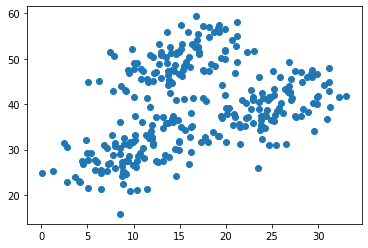

In [30]:
clusdat = pd.read_csv('cluster.csv')
plt.scatter(clusdat.X1,clusdat.X2)
plt.show()

<!-- END QUESTION -->

#### Question 6.2 [1]

- Use the scree plot method to choose the optimal number of clusters (k) to perform k-means.
- ASsign the optimal number of clusters to the variabe 'c_num'.

<!--
BEGIN QUESTION
name: q6.2
points: 
    each: 1
-->

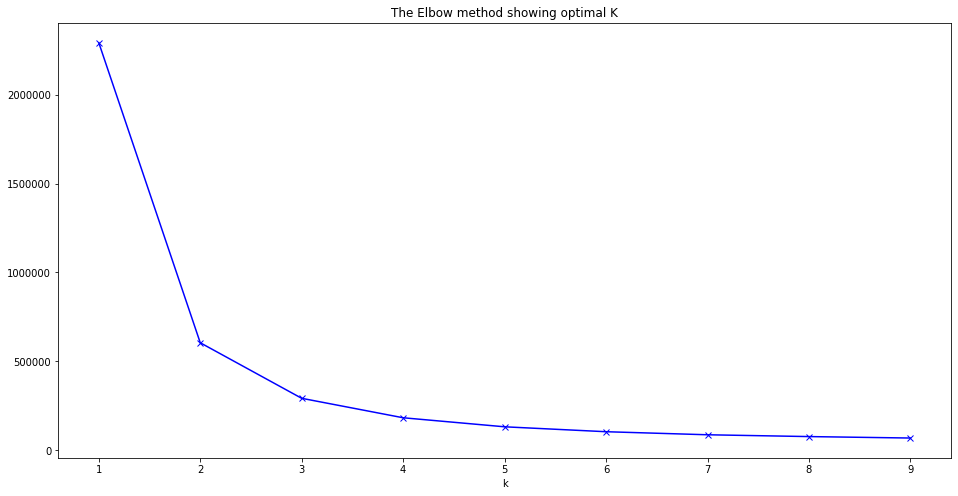

In [31]:
distortions = []
K = range(1,10)
for k in K:
    kmeansModel = KMeans(n_clusters = k)
    kmeansModel.fit(clusdat)
    distortions.append(kmeansModel.inertia_)
plt.figure(figsize = (16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.title('The Elbow method showing optimal K')
plt.show()
c_num = 3

In [32]:
grader.check("q6.2")

q6.2 results: All test cases passed!

#### Question 6.3 [2]

- Cluster the data using our prespecified cluster total using k-means
- Set the max_iter to 500 and the seed of 33.
- Assign the fitted prediction to the variable 'y_pred'

<!--
BEGIN QUESTION
name: q6.2
points: 2
-->

In [33]:
y_pred = KMeans(n_clusters = c_num, random_state = 33).fit_predict(clusdat)

In [34]:
grader.check("q6.2")

q6.2 results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Question 6.4 [1]

- Use the clusters obtained to visualize the clusters.
- - Use different colors to distinguish between the clusters

<!--
BEGIN QUESTION
name: q6.4
manual: true
points: 1
-->

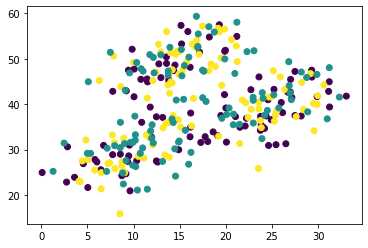

In [53]:
plt.scatter(clusdat.X1,clusdat.X2, c = y_pred)
plt.show()

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [69]:
grader.check_all()

q1 results:
    q1 - 1 result:
        Trying:
            isinstance(x, float)
        Expecting:
            True
        **********************************************************************
        Line 1, in q1 0
        Failed example:
            isinstance(x, float)
        Exception raised:
            Traceback (most recent call last):
              File "C:\Users\ikeoy\Anaconda3\lib\doctest.py", line 1329, in __run
                compileflags, 1), test.globs)
              File "<doctest q1 0[0]>", line 1, in <module>
                isinstance(x, float)
            NameError: name 'x' is not defined

    q1 - 2 result:
        Trying:
            isinstance(y, int)
        Expecting:
            True
        **********************************************************************
        Line 1, in q1 1
        Failed example:
            isinstance(y, int)
        Exception raised:
            Traceback (most recent call last):
              File "C:\Users\ikeoy\Anaconda3\

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [54]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)